In [1]:
# Import Data from the sleeping times and duration data
import pandas as pd
df_sleep = pd.read_csv("Margot_sleep.csv")

#Import the Data for the size
df_size = pd.read_csv("Margot_growth.csv")

df_expressed = pd.read_csv("Margot_expressed.csv")

df_formula = pd.read_csv("Margot_formula.csv")

df_diaper = pd.read_csv("Margot_diaper.csv")

df_pump = pd.read_csv("pump.csv")



#Add column for the size in the sleeping_pred filling in all na values

#Add a column for the Theoretical amount needed in last 24 hours to the sleeping_pred

#Add a column for the actual amount actually drank in the last 24 hours to sleeping_pred

#Add a column for the amount slept in rolling 24 hours from the moment of sleep

#Write a linear model to pred sleep duration

#Write 




In [2]:
#Transform df time column into datetime
df_sleep['Time'] = pd.to_datetime(df_sleep['Time'], format='%m/%d/%y, %I:%M %p') 
df_size['Time'] = pd.to_datetime(df_size['Time'], format='%m/%d/%y, %I:%M %p')
df_expressed['Time'] = pd.to_datetime(df_expressed['Time'], format='%m/%d/%y, %I:%M %p')
df_formula['Time'] = pd.to_datetime(df_formula['Time'], format='%m/%d/%y, %I:%M %p')
df_diaper['Time'] = pd.to_datetime(df_diaper['Time'], format='%m/%d/%y, %I:%M %p')
df_pump['Time'] = pd.to_datetime(df_pump['Time'], format='%m/%d/%y, %I:%M %p')

In [3]:
#Merge data sets for sleeping and growth
Margot_combined = pd.concat([df_sleep, df_size, df_expressed, df_formula, df_diaper, df_pump], join = 'outer', ignore_index=True)

# Sort by time column and reset index
Margot_combined = Margot_combined.sort_values('Time').reset_index(drop=True)

#pd.set_option('display.max_rows', None)
#print(Margot_combined[Margot_combined['Duration(minutes)'] != 0])


In [4]:
#Margot_combined['Weight (lbs.)'].fillna('Try', inplace = True)
#Margot_combined.head()

import numpy as np

#set head to display all rows
#pd.set_option('display.max_rows', None)



def fill_nan_with_last_value(df, col):
    """
  Replaces NaN values in a DataFrame with the last valid value in each column.
  """
    df[col] = df[col].ffill()

    return df

fill_nan_with_last_value(Margot_combined, 'Weight (lbs.)')



,Baby,Time,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),Right duration (min),Total Duration (min),Left amount (ml),Right amount (ml),Total amount (ml)
0,Margot,2024-06-23 01:14:00,NaN,NaN,19.88,8.00,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Margot,2024-06-26 14:30:00,NaN,Pee,NaN,8.00,NaN,NaN,Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Margot,2024-06-27 13:01:00,NaN,NaN,NaN,7.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Margot,2024-06-27 18:20:00,NaN,Tan,NaN,7.12,NaN,NaN,Mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Margot,2024-06-27 18:50:00,NaN,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,Margot,2024-08-07 16:03:00,NaN,NaN,NaN,10.31,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,Margot,2024-08-07 16:10:00,43.0,NaN,NaN,10.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,NaN,2024-08-07 16:20:00,NaN,NaN,NaN,10.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,20.0,60.0
1538,Margot,2024-08-07 17:37:00,NaN,NaN,NaN,10.31,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

#Sum the total amount and fill it in for columns with a duration value
def sum_last_values_for_nan_fill(df,col_1,col_2, col_3):
    df.fillna({col_2: 0}, inplace=True)
    df.fillna({col_1: 0}, inplace=True)
    df["temp_fill"] = 0
    df[col_3] = 0
    for i in df.index.tolist():
        if df.iloc[i][col_1]== 0:
            #print(i)
            #print(df.iloc[i]["temp_fill"])
            a = df.iloc[i][col_2]
            b = df.iloc[i-1]["temp_fill"]
            c = a + b
            #print(c)
            df.loc[i, "temp_fill"] = c
            #print(df.loc[i, "temp_fill"])
        else:
            df.loc[i, col_3] = df.iloc[i-1]['temp_fill']
    del df['temp_fill']
    #df[col_3] = np.where(df[col_3] == 0, np.nan, df[col_3])
    return df
            
Margot_combined = sum_last_values_for_nan_fill(Margot_combined,'Duration(minutes)','Amount (ml)', 'Since_nap (ml)')
#(Margot_combined[Margot_combined['Duration(minutes)'] != 0])



In [6]:
Margot_combined.head(50)

,Baby,Time,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),Right duration (min),Total Duration (min),Left amount (ml),Right amount (ml),Total amount (ml),Since_nap (ml)
0,Margot,2024-06-23 01:14:00,0.0,NaN,19.88,8.00,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Margot,2024-06-26 14:30:00,0.0,Pee,NaN,8.00,NaN,0.0,Wet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Margot,2024-06-27 13:01:00,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Margot,2024-06-27 18:20:00,0.0,Tan,NaN,7.12,NaN,0.0,Mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Margot,2024-06-27 18:50:00,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Margot,2024-06-27 22:26:00,153.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50
6,NaN,2024-06-27 22:41:00,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,NaN,NaN,15.0,15.0,30.0,0
7,Margot,2024-06-27 22:42:00,0.0,NaN,NaN,7.12,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,Margot,2024-06-27 22:44:00,0.0,NaN,NaN,7.12,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,Margot,2024-06-28 01:10:00,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
def datetime_index(df, time):
    
    # Convert the column to datetime, coercing errors to NaT
    df[time] = pd.to_datetime(df[time], errors='coerce')
    
    # Drop rows with NaT values (invalid dates)
    df = df.dropna(subset = [time])
    
    # Set 'datetime' as index 
    df.set_index(time, inplace=True)
    
    return df

    
Margot_combined = datetime_index(Margot_combined, "Time")



In [8]:
def rolling_sums(df, time, amount, weight, increments, rate):
    
    for i in increments:
        r = f"Rolling_{i}_hr_feed"
        w = f"{i}h"
        p = f"{i}hr_projected_feed"
        pm = f"plus_minus_{i}hr_rolling"
        
        #Calculate rolling sum
        df[r] = df[amount].rolling(window = w).sum() 
        
        #make a projected feed amount column
        df[p] = df[weight] * (i/24) * rate
        
        #make an plus/minus column
        df[pm] = df[r] - df[p]
        
    return df

Margot_combined_new_par = rolling_sums(Margot_combined, "Time", 'Amount (ml)', 'Weight (lbs.)',  [24, 12, 3], 72)
#pd.set_option('display.max_rows', None)
Margot_combined_new_par.head(100)
#print(Margot_combined_new_par[(Margot_combined_new_par['Duration (ml)']!= 0)])


,Baby,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),...,Since_nap (ml),Rolling_24_hr_feed,24hr_projected_feed,plus_minus_24hr_rolling,Rolling_12_hr_feed,12hr_projected_feed,plus_minus_12hr_rolling,Rolling_3_hr_feed,3hr_projected_feed,plus_minus_3hr_rolling
Time,,,,,,,,,,,,,,,,,,,,,
2024-06-23 01:14:00,Margot,0.0,NaN,19.88,8.00,13.0,0.0,NaN,NaN,NaN,...,0,0.0,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00
2024-06-26 14:30:00,Margot,0.0,Pee,NaN,8.00,NaN,0.0,Wet,NaN,NaN,...,0,0.0,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00
2024-06-27 13:01:00,Margot,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,...,0,0.0,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08
2024-06-27 18:20:00,Margot,0.0,Tan,NaN,7.12,NaN,0.0,Mixed,NaN,NaN,...,0,0.0,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08
2024-06-27 18:50:00,Margot,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,...,0,50.0,512.64,-462.64,50.0,256.32,-206.32,50.0,64.08,-14.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30 15:17:00,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Wet,NaN,NaN,...,0,532.0,512.64,19.36,240.0,256.32,-16.32,45.0,64.08,-19.08
2024-06-30 16:40:00,NaN,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,11.0,...,0,422.0,512.64,-90.64,240.0,256.32,-16.32,45.0,64.08,-19.08
2024-06-30 16:45:00,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Dirty,NaN,NaN,...,0,422.0,512.64,-90.64,170.0,256.32,-86.32,45.0,64.08,-19.08


In [9]:
#Turn the index into a Time column
Margot_combined_new_par['Time'] = Margot_combined_new_par.index

Margot_combined_new_par.reset_index(drop = True)

print(Margot_combined_new_par.columns.tolist())


def wake_window(df, duration, time):
    df = df.reset_index(drop = True)
    df = df.sort_values(time)
    df['awake_window(minutes)'] = 0
    #NOTE: in this function Time must be a coluumn of the dataframe and not an index
    
  #  df[time] = pd.to_datetime(df[time], errors='coerce')
    
    #remove all zero values for durration
    df_not = df[(df[duration] == 0)] 
    df = df[df[duration] !=0]

    #fill in awake windo column with minutes awake
    df['awake_window(minutes)'] = df.loc[:, time].diff().dt.total_seconds() / 60

    #rejoin the dataframe with the original and sort by time
    
    df = pd.concat([df, df_not])
    df = df.sort_values(time)
    return df

#time of day evening afternoon morning  

Margot_combined_new_par = wake_window(Margot_combined_new_par, 'Duration(minutes)', 'Time')
    
Margot_combined_new_par.head(100) 




['Baby', 'Duration(minutes)', 'Note', 'Length (inches)', 'Weight (lbs.)', 'Head Size (inches)', 'Amount (ml)', 'Status', 'Start Side', 'Left duration (min)', 'Right duration (min)', 'Total Duration (min)', 'Left amount (ml)', 'Right amount (ml)', 'Total amount (ml)', 'Since_nap (ml)', 'Rolling_24_hr_feed', '24hr_projected_feed', 'plus_minus_24hr_rolling', 'Rolling_12_hr_feed', '12hr_projected_feed', 'plus_minus_12hr_rolling', 'Rolling_3_hr_feed', '3hr_projected_feed', 'plus_minus_3hr_rolling', 'Time']


,Baby,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),...,24hr_projected_feed,plus_minus_24hr_rolling,Rolling_12_hr_feed,12hr_projected_feed,plus_minus_12hr_rolling,Rolling_3_hr_feed,3hr_projected_feed,plus_minus_3hr_rolling,Time,awake_window(minutes)
0,Margot,0.0,NaN,19.88,8.00,13.0,0.0,NaN,NaN,NaN,...,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-23 01:14:00,0.0
1,Margot,0.0,Pee,NaN,8.00,NaN,0.0,Wet,NaN,NaN,...,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-26 14:30:00,0.0
2,Margot,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,...,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 13:01:00,0.0
3,Margot,0.0,Tan,NaN,7.12,NaN,0.0,Mixed,NaN,NaN,...,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 18:20:00,0.0
4,Margot,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,...,512.64,-462.64,50.0,256.32,-206.32,50.0,64.08,-14.08,2024-06-27 18:50:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Wet,NaN,NaN,...,512.64,19.36,240.0,256.32,-16.32,45.0,64.08,-19.08,2024-06-30 15:17:00,0.0
96,NaN,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,11.0,...,512.64,-90.64,240.0,256.32,-16.32,45.0,64.08,-19.08,2024-06-30 16:40:00,0.0
97,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Dirty,NaN,NaN,...,512.64,-90.64,170.0,256.32,-86.32,45.0,64.08,-19.08,2024-06-30 16:45:00,0.0
98,Margot,0.0,NaN,NaN,7.12,NaN,70.0,NaN,NaN,NaN,...,512.64,-20.64,240.0,256.32,-16.32,115.0,64.08,50.92,2024-06-30 17:15:00,0.0


In [10]:
#make a time of day catagorical variable where evening 18 - 24, Night 0 - 6, Morning 6 - 12, Afternoon 12 - 18
def categorize_time(time):
  if time.hour >= 5 and time.hour < 12:
    return 'Morning'
  elif time.hour >= 12 and time.hour < 17:
    return 'Afternoon'
  elif time.hour >= 17 and time.hour < 22:
    return 'Evening'
  else:
    return 'Night'

# Create the new categorical column
Margot_combined_new_par['time_of_day'] = Margot_combined_new_par['Time'].apply(categorize_time)
Margot_combined_new_par.head()


,Baby,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),...,plus_minus_24hr_rolling,Rolling_12_hr_feed,12hr_projected_feed,plus_minus_12hr_rolling,Rolling_3_hr_feed,3hr_projected_feed,plus_minus_3hr_rolling,Time,awake_window(minutes),time_of_day
0,Margot,0.0,NaN,19.88,8.00,13.0,0.0,NaN,NaN,NaN,...,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-23 01:14:00,0.0,Night
1,Margot,0.0,Pee,NaN,8.00,NaN,0.0,Wet,NaN,NaN,...,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-26 14:30:00,0.0,Afternoon
2,Margot,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,...,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 13:01:00,0.0,Afternoon
3,Margot,0.0,Tan,NaN,7.12,NaN,0.0,Mixed,NaN,NaN,...,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 18:20:00,0.0,Evening
4,Margot,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,...,-462.64,50.0,256.32,-206.32,50.0,64.08,-14.08,2024-06-27 18:50:00,0.0,Evening


In [11]:
#Insert measurment hot code: sleep, feed, diaper, pump

def classify_measurment(df, var, col_1, col_2, col_3, col_4):
    for i in df.index.tolist():
        if df.loc[i, col_1] !=0:
            df.loc[i, 'measurment'] = var[0]
        elif df.loc[i, col_2] !=0:
            df.loc[i, 'measurment'] = var[1]
        elif pd.isna(df.at[i, col_3]) == False:
            df.loc[i, 'measurment'] = var[2]
        elif pd.isna(df.at[i, col_4]) == False:
            df.loc[i, 'measurment'] = var[3]
        else:
            df.loc[i, 'measurment'] = 0

    return df
    
var = ['sleep', 'feed', 'diaper', 'pump']

Margot_combined_new_par = classify_measurment(Margot_combined_new_par, var, 'Duration(minutes)', 'Amount (ml)', 'Status', 'Total amount (ml)') 

Margot_combined_new_par.head(100)

C:\Users\Andy_Code\AppData\Local\Temp\ipykernel_20940\3811432826.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'diaper' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'measurment'] = var[2]


,Baby,Duration(minutes),Note,Length (inches),Weight (lbs.),Head Size (inches),Amount (ml),Status,Start Side,Left duration (min),...,Rolling_12_hr_feed,12hr_projected_feed,plus_minus_12hr_rolling,Rolling_3_hr_feed,3hr_projected_feed,plus_minus_3hr_rolling,Time,awake_window(minutes),time_of_day,measurment
0,Margot,0.0,NaN,19.88,8.00,13.0,0.0,NaN,NaN,NaN,...,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-23 01:14:00,0.0,Night,0.0
1,Margot,0.0,Pee,NaN,8.00,NaN,0.0,Wet,NaN,NaN,...,0.0,288.00,-288.00,0.0,72.00,-72.00,2024-06-26 14:30:00,0.0,Afternoon,diaper
2,Margot,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,NaN,...,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 13:01:00,0.0,Afternoon,0
3,Margot,0.0,Tan,NaN,7.12,NaN,0.0,Mixed,NaN,NaN,...,0.0,256.32,-256.32,0.0,64.08,-64.08,2024-06-27 18:20:00,0.0,Evening,diaper
4,Margot,0.0,NaN,NaN,7.12,NaN,50.0,NaN,NaN,NaN,...,50.0,256.32,-206.32,50.0,64.08,-14.08,2024-06-27 18:50:00,0.0,Evening,feed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Wet,NaN,NaN,...,240.0,256.32,-16.32,45.0,64.08,-19.08,2024-06-30 15:17:00,0.0,Afternoon,diaper
96,NaN,0.0,NaN,NaN,7.12,NaN,0.0,NaN,NaN,11.0,...,240.0,256.32,-16.32,45.0,64.08,-19.08,2024-06-30 16:40:00,0.0,Afternoon,pump
97,Margot,0.0,NaN,NaN,7.12,NaN,0.0,Dirty,NaN,NaN,...,170.0,256.32,-86.32,45.0,64.08,-19.08,2024-06-30 16:45:00,0.0,Afternoon,diaper
98,Margot,0.0,NaN,NaN,7.12,NaN,70.0,NaN,NaN,NaN,...,240.0,256.32,-16.32,115.0,64.08,50.92,2024-06-30 17:15:00,0.0,Evening,feed


In [12]:
#Clean the unwanted columns
#Margot_combined_new_par = Margot_combined_new_par.drop(Margot_combined_new_par.columns[['Baby', 'Note','Length (inches)', 'Head Size (inches)',  'Amount (ml)']], axis=1)

#Reorder
Margot_combined_new_par = Margot_combined_new_par[['Time', 'measurment', 'Duration(minutes)', 'awake_window(minutes)', 'time_of_day', 'Weight (lbs.)', 'Since_nap (ml)', 'Rolling_24_hr_feed', '24hr_projected_feed', 'plus_minus_24hr_rolling', 'Rolling_12_hr_feed', '12hr_projected_feed', 'plus_minus_12hr_rolling', 'Rolling_3_hr_feed', '3hr_projected_feed', 'plus_minus_3hr_rolling', 'Amount (ml)', 'Status','Total amount (ml)', 'Total Duration (min)' ]]


#Drop zero duration
Margot_combined_new_par.head(1000)

,Time,measurment,Duration(minutes),awake_window(minutes),time_of_day,Weight (lbs.),Since_nap (ml),Rolling_24_hr_feed,24hr_projected_feed,plus_minus_24hr_rolling,Rolling_12_hr_feed,12hr_projected_feed,plus_minus_12hr_rolling,Rolling_3_hr_feed,3hr_projected_feed,plus_minus_3hr_rolling,Amount (ml),Status,Total amount (ml),Total Duration (min)
0,2024-06-23 01:14:00,0.0,0.0,0.0,Night,8.00,0,0.0,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,0.0,NaN,NaN,NaN
1,2024-06-26 14:30:00,diaper,0.0,0.0,Afternoon,8.00,0,0.0,576.00,-576.00,0.0,288.00,-288.00,0.0,72.00,-72.00,0.0,Wet,NaN,NaN
2,2024-06-27 13:01:00,0,0.0,0.0,Afternoon,7.12,0,0.0,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,0.0,NaN,NaN,NaN
3,2024-06-27 18:20:00,diaper,0.0,0.0,Evening,7.12,0,0.0,512.64,-512.64,0.0,256.32,-256.32,0.0,64.08,-64.08,0.0,Mixed,NaN,NaN
4,2024-06-27 18:50:00,feed,0.0,0.0,Evening,7.12,0,50.0,512.64,-462.64,50.0,256.32,-206.32,50.0,64.08,-14.08,50.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-07-22 18:32:00,feed,0.0,0.0,Evening,9.62,0,670.0,692.64,-22.64,385.0,346.32,38.68,110.0,86.58,23.42,40.0,NaN,NaN,NaN
996,2024-07-22 19:14:00,feed,0.0,0.0,Evening,9.62,0,685.0,692.64,-7.64,370.0,346.32,23.68,125.0,86.58,38.42,15.0,NaN,NaN,NaN
997,2024-07-22 20:00:00,feed,0.0,0.0,Evening,9.62,0,750.0,692.64,57.36,400.0,346.32,53.68,140.0,86.58,53.42,65.0,NaN,NaN,NaN
998,2024-07-22 20:14:00,diaper,0.0,0.0,Evening,9.62,0,750.0,692.64,57.36,400.0,346.32,53.68,140.0,86.58,53.42,0.0,Wet,NaN,NaN


In [13]:
# Specify the file path and name
file_path = 'Margot_Cleaned.csv'

# Export the DataFrame to the CSV file
Margot_combined_new_par.to_csv(file_path, index=False)

In [14]:
#Redownload the csv file cleaned and only use the nessisary rows
Margot_df = pd.read_csv('Margot_Cleaned.csv')

index = Margot_df.columns.tolist()

print(index)

#drop unwanted columns
Margot_df.drop(columns=['Weight (lbs.)', 'Amount (ml)', 'Rolling_3_hr_feed', '3hr_projected_feed', 'Rolling_12_hr_feed',
                        '12hr_projected_feed', 'Rolling_24_hr_feed', '24hr_projected_feed', 'Status', 'Total amount (ml)', 'Total Duration (min)'], inplace=True)

#Only use 'sleep' measurements
Margot_df = Margot_df[Margot_df['measurment'] == 'sleep']

Margot_df.head(50)

#Create a Conffusion Matrix.  We could do this to predict naps greater than 2 hours

['Time', 'measurment', 'Duration(minutes)', 'awake_window(minutes)', 'time_of_day', 'Weight (lbs.)', 'Since_nap (ml)', 'Rolling_24_hr_feed', '24hr_projected_feed', 'plus_minus_24hr_rolling', 'Rolling_12_hr_feed', '12hr_projected_feed', 'plus_minus_12hr_rolling', 'Rolling_3_hr_feed', '3hr_projected_feed', 'plus_minus_3hr_rolling', 'Amount (ml)', 'Status', 'Total amount (ml)', 'Total Duration (min)']


,Time,measurment,Duration(minutes),awake_window(minutes),time_of_day,Since_nap (ml),plus_minus_24hr_rolling,plus_minus_12hr_rolling,plus_minus_3hr_rolling
5,2024-06-27 22:26:00,sleep,153.0,NaN,Night,50,-462.64,-206.32,-64.08
13,2024-06-28 01:39:00,sleep,2.0,193.0,Night,76,-386.64,-130.32,11.92
17,2024-06-28 05:32:00,sleep,47.0,233.0,Morning,70,-316.64,-60.32,5.92
20,2024-06-28 06:40:00,sleep,165.0,68.0,Morning,50,-266.64,-10.32,55.92
25,2024-06-28 10:20:00,sleep,131.0,220.0,Morning,60,-206.64,-0.32,-4.08
28,2024-06-28 12:50:00,sleep,157.0,150.0,Afternoon,60,-146.64,33.68,-4.08
33,2024-06-28 16:21:00,sleep,150.0,211.0,Afternoon,60,-86.64,43.68,-4.08
38,2024-06-28 19:32:00,sleep,61.0,191.0,Evening,70,-66.64,-6.32,5.92
40,2024-06-28 20:50:00,sleep,190.0,78.0,Evening,20,-46.64,13.68,25.92
44,2024-06-29 00:23:00,sleep,142.0,213.0,Night,0,-72.64,-46.32,-64.08


In [15]:
index = Margot_df.columns.tolist()

print(index)

['Time', 'measurment', 'Duration(minutes)', 'awake_window(minutes)', 'time_of_day', 'Since_nap (ml)', 'plus_minus_24hr_rolling', 'plus_minus_12hr_rolling', 'plus_minus_3hr_rolling']


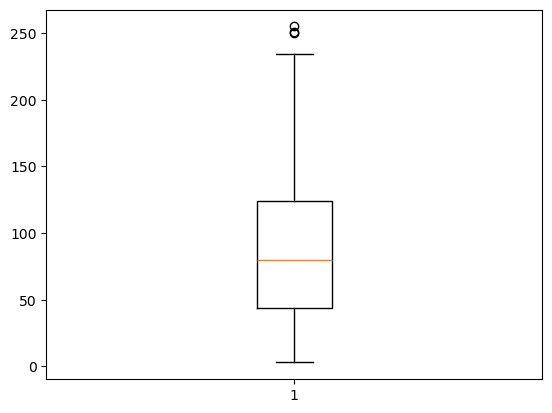

['Time', 'measurment', 'Duration', 'Awake_Window', 'Part_of_Day', 'Since_Nap', 'twenty_four_hr', 'twelve_hr', 'three_hr']


In [16]:
#Remove outliers from data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(df, columns, method='zscore', threshold=2.58):
  """
  Removes outliers from specified columns in a DataFrame.

  Args:
    df: The pandas DataFrame.
    columns: A list of column names to check for outliers.
    method: The method to use for outlier detection ('zscore' or 'iqr').
    threshold: The threshold for outlier detection (used for z-score or IQR).

  Returns:
    A new DataFrame with outliers removed.
  """

  df_out = df.copy()

  for col in columns:
    if method == 'zscore':
      z_scores = np.abs(stats.zscore(df_out[col]))
      df_out = df_out[z_scores <= threshold]
    elif method == 'iqr':
      Q1 = df_out[col].quantile(0.25)
      Q3 = df_out[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    else:
      raise ValueError("Invalid method. Choose 'zscore' or 'iqr'.")

  return df_out

# Example usage:


Margot_df = remove_outliers(Margot_df, columns=['Duration(minutes)', 'awake_window(minutes)', 'Since_nap (ml)', 'plus_minus_24hr_rolling', 'plus_minus_12hr_rolling', 'plus_minus_3hr_rolling'], method='iqr')


# Visualize with box plot
plt.boxplot(Margot_df['Duration(minutes)'])
plt.show()

Margot_df.rename(columns={'Duration(minutes)': 'Duration', 'awake_window(minutes)': 'Awake_Window', 'time_of_day': 'Part_of_Day', 'Since_nap (ml)':'Since_Nap', 'plus_minus_24hr_rolling': 'twenty_four_hr', 'plus_minus_12hr_rolling': 'twelve_hr', 'plus_minus_3hr_rolling': 'three_hr'}, inplace=True)

Margot_df.head()

print(Margot_df.columns.tolist())

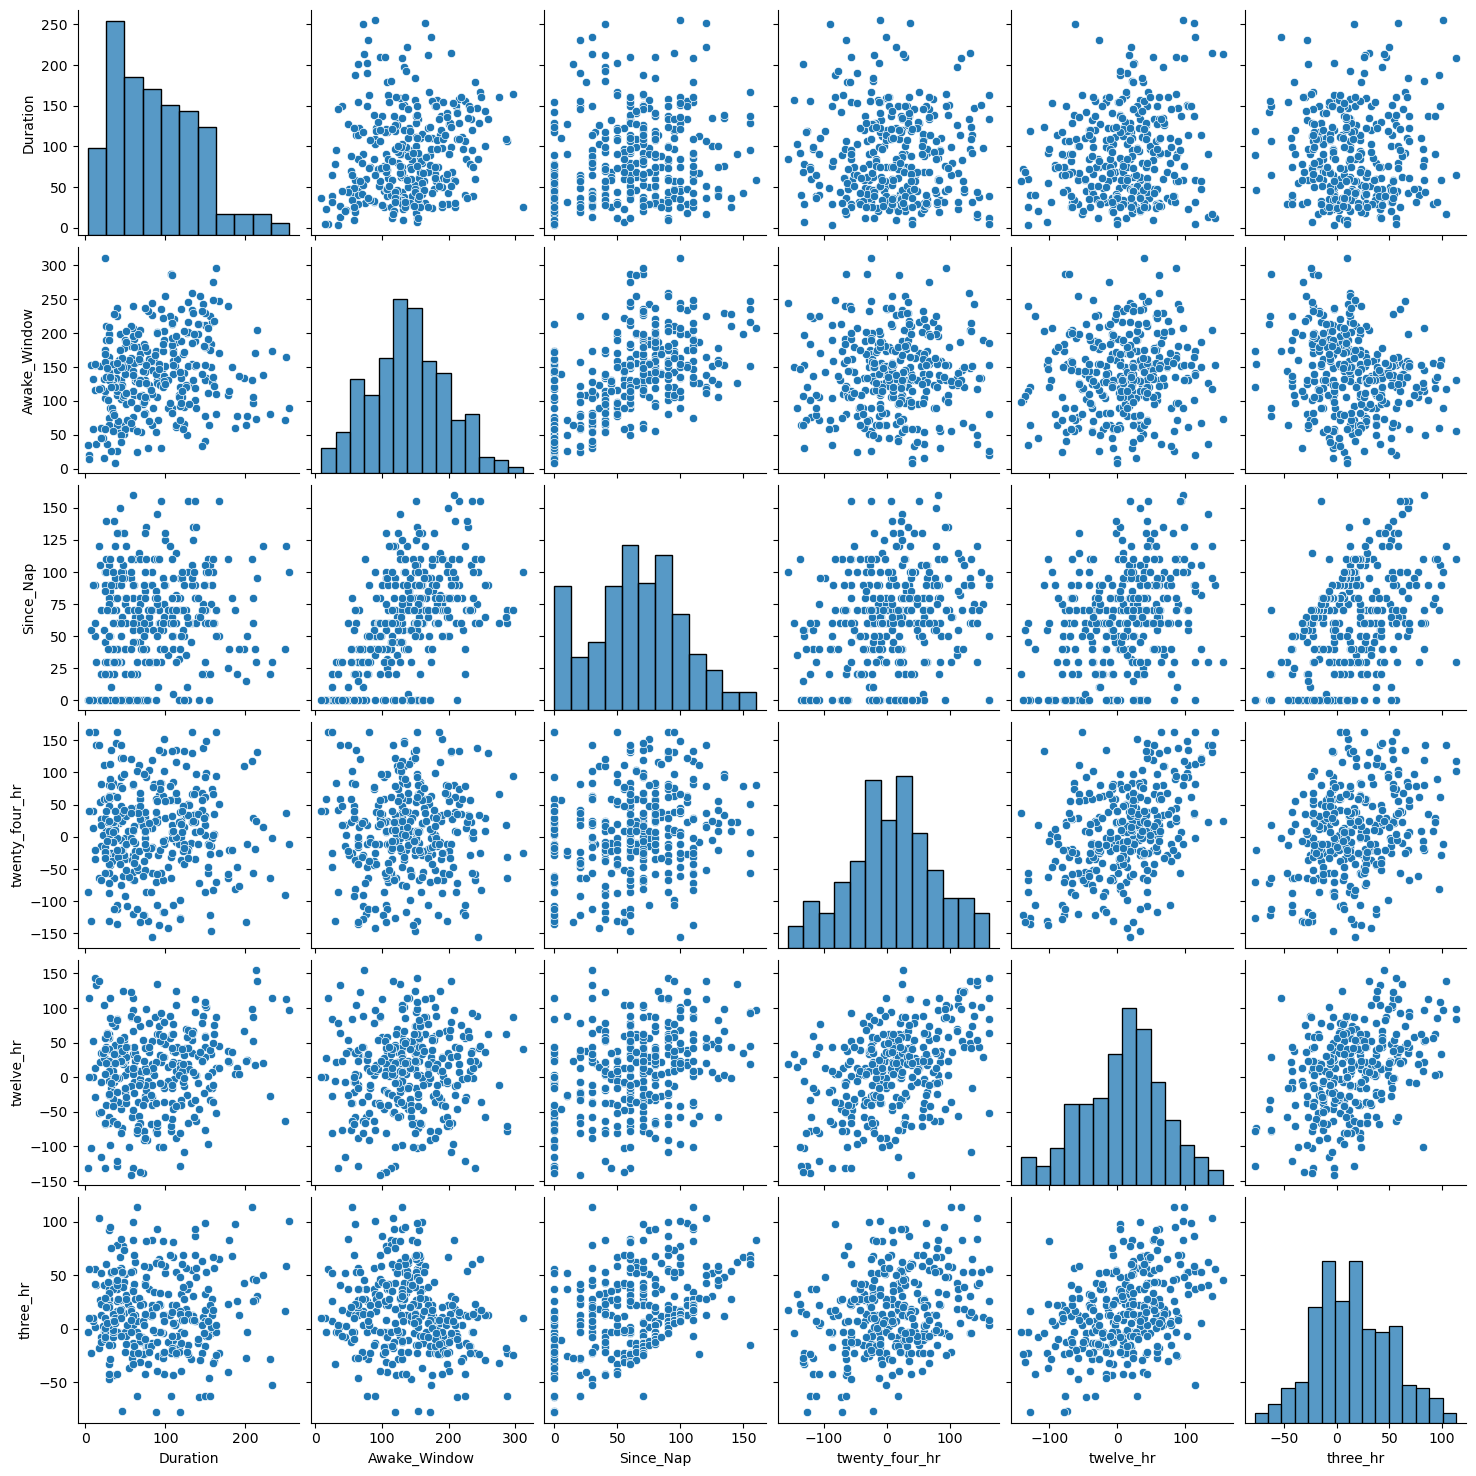

In [32]:
sns.pairplot(Margot_df)

In [17]:
def column_datatypes(df):
  """Prints the data type of each column in a DataFrame.

  Args:
    df: The pandas DataFrame.
  """

  for col in df.columns:
    print(f"{col}: {df[col].dtype}")
column_datatypes(Margot_df)

Time: object
measurment: object
Duration: float64
Awake_Window: float64
Part_of_Day: object
Since_Nap: int64
twenty_four_hr: float64
twelve_hr: float64
three_hr: float64


In [18]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Build a formula for model

#Build a ols model:

ols_formula = 'Duration ~ Awake_Window + C(Part_of_Day) + Since_Nap + twenty_four_hr + twelve_hr + three_hr'
OLS_model = ols(formula = ols_formula, data = Margot_df).fit()

OLS_model.summary()



#Create LinearRegression Model with X, Y Test/Train split:

X_train, X_test, y_train, y_test = train_test_split(Margot_df[['Awake_Window', 'Since_Nap', 'twenty_four_hr', 'twelve_hr', 'three_hr']], Margot_df['Duration'], test_size = 0.3, random_state = 42) 

scaler = StandardScaler().fit(X_train)

#X_train_scaled = scaler.transform(X_train)

LR = LinearRegression()

LR.fit(X_train, y_train)

r_sq_score = LR.score(X_train, y_train)

y_pred_train = LR.predict(X_train)

print(r_sq_score)

y_pred_train = LR.predict(X_train)

print(y_pred_train)

print(LR.intercept_)



0.09138867897478842
[ 90.72305666  85.57222823  88.50058994 109.93772157  74.53041195
  82.59037316  57.7424411   92.25316669  80.90304042  86.15973012
 101.42906856 106.18235053  89.67753409 102.89592336  88.10098149
  84.85418506  75.0650409   98.91005133  77.22302778  84.24293957
  66.50864965  87.6671296   88.93561995  82.06888331  43.92159945
  82.20582412  82.07851801 112.69224046  93.69272734 106.20057696
  62.0404831   74.99581758  82.99085946  88.35199897  87.55682215
  94.68934628  79.68607438  81.7995385   86.27272053  55.43674326
 104.79647512  74.98911223  84.26477891 106.43712856  86.31170661
  79.07571074  89.71563012  80.10509092  72.7534495   64.80506855
  78.10861817  68.34970299 114.8210318   98.92985219  77.38216622
  72.60670824  92.8939647   82.61596548  80.5533281  118.81095934
  85.98810782  77.55672647  44.26408877  96.27466783  62.53532034
  94.83705455  85.23407332  47.20347109  59.05671206  83.94694138
  95.06619584  90.86817932 100.67507601  79.12639784 118

In [30]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

[ 83.469635  37.467056  38.25515  104.76803  154.35336  118.53059
  87.37475  177.8249    33.421753  87.55248   50.534573  46.319733
  81.96664  128.38669   76.773766  88.18876   75.92469   48.96085
  62.04214  186.42976  108.63685  144.73468  163.01938  168.36444
  76.359795  94.937965  61.449272  73.79546  105.270966 125.060326
 153.9666    76.980896  78.985344 101.20277  109.93906  118.498856
 113.80821   43.757267 149.77725   62.545086  82.958084 105.977875
  53.107983  57.324314 110.31926  125.459755  86.194214 100.649956
  65.06989   82.85298   79.903305 145.14992   60.299088  62.187256
 119.81157   84.82112  120.31062  140.41002   32.004025  83.97527
  69.18325   63.77926   78.1803    66.16359   94.74217  110.22456
  54.54803   60.711784  80.84954   71.92821  146.77132   74.906586
 119.100426 119.34377  136.31049   65.93374   69.07013   82.952675
 147.24078   79.30775   94.116066 120.426125 127.35896   74.85026
  38.59924   73.146965 137.94917   82.48499   97.00069   75.57294
  